# Surgical

!['image'](image.png)

### import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from perceptron import Perceptron

### read and show the data:

In [2]:
data = pd.read_csv("Surgical-deepnet.csv")
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


## Preprocess:

In [3]:
data.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [4]:
data.corr()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
bmi,1.000000,-0.131775,0.198517,-0.027676,0.054377,0.165106,-0.024774,0.276938,0.138284,0.031200,...,-0.138256,0.064263,-0.172120,0.047607,-0.046647,0.062073,-0.005362,-0.008283,-0.158021,-0.142174
Age,-0.131775,1.000000,0.464704,-0.097013,-0.077871,0.534403,0.025245,-0.047026,-0.126093,0.599267,...,-0.365726,-0.378483,0.396119,-0.153218,0.252315,-0.373015,0.006337,-0.472597,0.098534,-0.111327
asa_status,0.198517,0.464704,1.000000,-0.031495,0.130995,0.428380,0.049368,0.166710,0.028396,0.288574,...,-0.110116,-0.184197,0.190633,-0.030694,0.113079,-0.169813,0.065111,-0.144174,-0.010930,-0.005030
baseline_cancer,-0.027676,-0.097013,-0.031495,1.000000,0.607025,-0.065392,0.012017,0.048585,0.026289,-0.337672,...,0.280105,0.156281,-0.022222,0.066409,-0.087130,0.148956,0.029138,0.332292,-0.001588,0.165639
baseline_charlson,0.054377,-0.077871,0.130995,0.607025,1.000000,0.014420,0.029417,0.272373,0.074498,-0.277666,...,0.326956,0.138473,-0.057433,0.080301,-0.080774,0.140055,0.076886,0.355927,-0.051101,0.185514
baseline_cvd,0.165106,0.534403,0.428380,-0.065392,0.014420,1.000000,0.003970,0.158813,-0.002405,0.363864,...,-0.332444,-0.205884,0.226689,-0.083604,0.135849,-0.193553,0.000051,-0.323526,-0.023040,-0.090748
baseline_dementia,-0.024774,0.025245,0.049368,0.012017,0.029417,0.003970,1.000000,0.022378,-0.003658,-0.017269,...,0.060437,0.022263,-0.009824,0.018829,-0.035513,0.016739,-0.004404,0.060250,-0.019633,0.047781
baseline_diabetes,0.276938,-0.047026,0.166710,0.048585,0.272373,0.158813,0.022378,1.000000,0.101449,-0.100828,...,-0.017999,0.087231,-0.080030,0.032067,-0.054824,0.089584,-0.003372,0.070804,-0.068685,0.015916
baseline_digestive,0.138284,-0.126093,0.028396,0.026289,0.074498,-0.002405,-0.003658,0.101449,1.000000,-0.117452,...,0.033600,0.136223,-0.142109,0.058300,-0.084934,0.111229,0.011117,0.115694,-0.014116,0.051219
baseline_osteoart,0.031200,0.599267,0.288574,-0.337672,-0.277666,0.363864,-0.017269,-0.100828,-0.117452,1.000000,...,-0.587628,-0.368019,0.304294,-0.191824,0.229134,-0.350420,-0.029511,-0.735616,0.060440,-0.279056


In [5]:
X = data.copy().drop("complication",axis=1).values
Y = data["complication"].values

X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(11708, 24)
(11708,)
(2927, 24)
(2927,)


### Use of the model:

In [6]:
model = Perceptron(learning_rate=0.0001,input_length=X_train.shape[1])
model.fit(X_train,Y_train,epochs=40,activation_function="sigmoid",X_test=X_test,Y_test=Y_test)
Y_pred = model.predict(X_test)
model.evaluate(X_test,Y_test,"mse")


(0.2336360813574601, 1935.7393235394602)

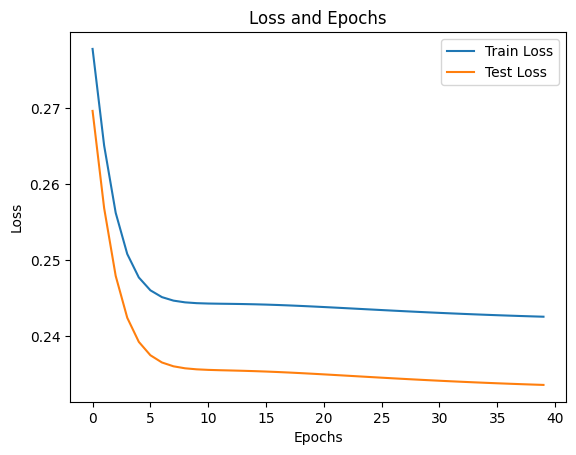

In [7]:
model.show_plot_losses()

In [ ]:
model.show_plot_accuracy()

In [ ]:
cm = model.Calculate_confusion_matrix(Y_test,Y_pred)
print(cm)
model.plot_confusion_matrix(cm)